### Vision Transformer Model


**Vision Transformer (ViT) models** build upon the foundation of transformer models by adapting their architecture for image analysis. By dividing images into patches and processing them like sequences of data, ViTs leverage the same self-attention mechanisms to capture detailed relationships within images. This seamless adaptation allows ViTs to achieve superior performance in image analysis tasks, showcasing the versatility and robustness of transformer models in handling diverse data types.

#### Architecture

In [9]:


class ViTModel(nn.Module):
    def __init__(self, num_classes=1):
        super(ViTModel, self).__init__()
        self.model = timm.create_model('vit_base_patch16_224', pretrained=True)
        self.model.head = nn.Linear(self.model.head.in_features, num_classes)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.model(x)
        x = self.sigmoid(x)
        return x




device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model1 = ViTModel(num_classes=1).to(device)
criterion = nn.BCELoss()
optimizer = optim.Adam(model1.parameters(), lr=0.00001, weight_decay=1e-5)
print(model1)

model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

ViTModel(
  (model): VisionTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      (norm): Identity()
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (patch_drop): Identity()
    (norm_pre): Identity()
    (blocks): Sequential(
      (0): Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (q_norm): Identity()
          (k_norm): Identity()
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (ls1): Identity()
        (drop_path1): Identity()
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (act): GELU(approximate='none')
   

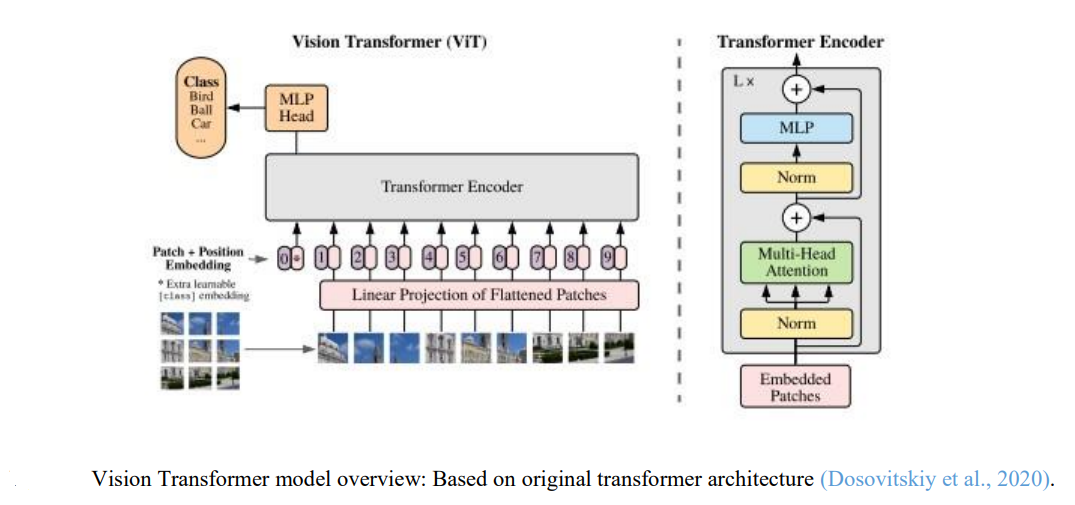